<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](); the content is available [on GitHub]().*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book]()!*

<!--NAVIGATION-->
< [CHAPTER 24. Fourier Transforms](chapter24.00-Fourier-Transforms.ipynb) | [Contents](Index.ipynb) | [24.2 Discrete Fourier Transform (DFT)](chapter24.02-Discrete-Fourier-Transform.ipynb) >

# The Basics of Waves

There are many types of waves in our life, for example, if you throw a rock into a pond, you can see the waves form and travel in the water. Of course, there are many more examples of waves, some of them are even difficult to see, such as such as sound waves, earthquake waves, microwaves (that we use to cook our food in the kitchen). But in physics, a wave is a disturbance that travels through space and matter with a transferring energy from one place to another. It is important to study waves in our life to understand how they form, travel and so on. In this chapter, we will cover a basic tool that help us to understand and study the waves - the **Fourier Transform**. But before we proceed, let's first get familiar how do we actually model the waves and study it. 

## Model a wave using mathematical tools

We can model a single wave as a field with a function $F(x, t)$, where $x$ is the location of a point in space, while $t$ is the time. One simplest case is the shape of a sine wave change over $x$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

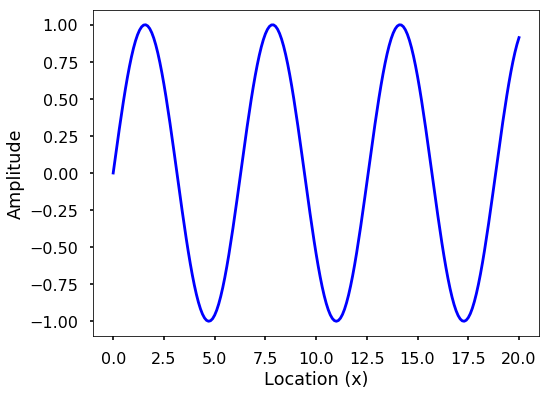

In [2]:
x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()

We can think of the sine wave can change both in time and space. If we plot the changes at various locations, each time snapshot will be a sine wave changes with location. See the following figure with a fix point at $x=2.5$ showing as a red dot. Of course, you can see the changes over time at specific location as well, you can plot this by yourself. 

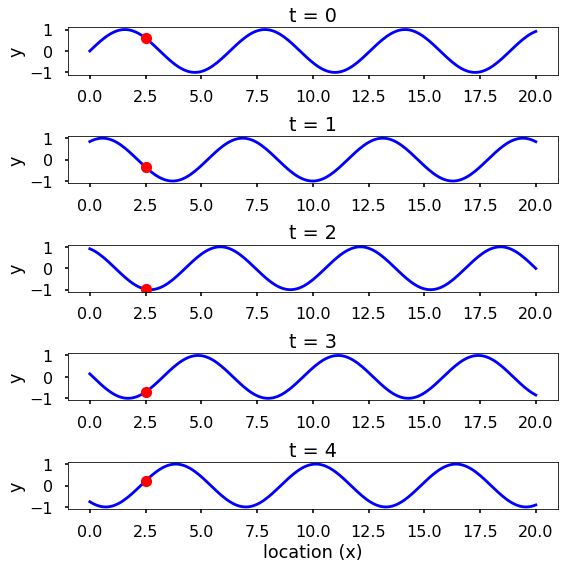

In [3]:
fig = plt.figure(figsize = (8,8))

times = np.arange(5)

n = len(times)

for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y [25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()
plt.show()

## Characteristics of a wave

We can see waves can be a continuous entity both in time and space. But in reality, many times we discrete the time and space at various points. For example, we can use sensors such as accelerometers (can measure the acceleration of a movement) at different locations on the Earth to monitor the earthquakes, which is spatial discretization. Similarly, these sensors usually record the data at certain times which is a temporal discretization. For a single wave, it has different characteristics. See the following two figures. 

<img src="images/24.01.01-period_amplitude.jpg" alt="Period and Amplitude" title="Period and Amplitude of a sine wave." width="500"/>

<img src="images/24.01.02-wavelength_amplitude.jpg" alt="Wavelength and Amplitude" title="Wavelength and Amplitude of a sine wave." width="500"/>

**Amplitude** is used to describe the difference between the maximum values to the baseline value (see the above figures). A sine wave is a periodic signal, which means it repeats itself after certain time, which can be measured by **period**. Period of a wave is time it takes to finish the complete cycle, in the figure, we can see that the period can be measured from the two adjacent peaks. **Wavelength** measures the distance between two successive crests or troughs of a wave. **Frequency** describes the number of waves that pass a fixed place in a given amount of time. Frequency can be measured by how many cycles pass within 1 second. Therefore, the unit of frequency is cycles/second, or more commonly used **Hertz** (abbreviated **Hz**). Frequency is different from period, but they are related to each other. Frequency refers to how often something happens while period refers to the time it takes to complete something, mathematically, 

$$period = \frac{1}{frequency}$$

From the two figures, we can also see that blue dots on the sine waves, these are the discretization points we did both in time and space. Therefore, only at these dots, we have sampled the value of the wave. Usually when we record a wave, we need to specify how often we sample the wave in time, this is called **sampling**. And this rate is called **sampling rate**, with the unit Hz. For example, if we sample a wave at 2 Hz, it means that every second we sample two data points. Since we understand more about the basics about a wave, now let's see a sine wave more carefully. A sine wave can be represented by the following equation:

$$ y(t) = Asin(\omega{t}+\phi)$$

where $A$ is the amplitude of the wave, $\omega$ is the **angular frequency**, which specifies how many cycles occur in a second, in radians per second. $\phi$ is the **phase** of the signal. If $T$ is the period of the wave, and $f$ is the frequency of the wave, then $\omega$ has the following relationship to them:

$$\omega = \frac{2\pi}{T} = 2\pi{f}$$

**TRY IT!** Generate two sine waves with time between 0 and 1 seconds and frequency is 5 Hz and 10 Hz, all sampled at 100 Hz. Plot the two waves and see the difference. Count how many cycles in the 1 second. 

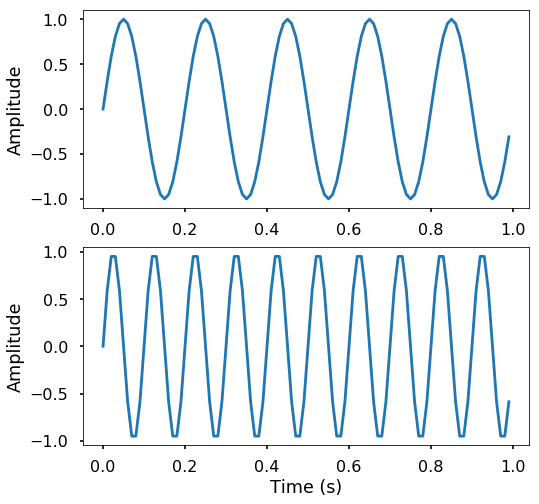

In [4]:
# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y)
plt.ylabel('Amplitude')

freq = 10   
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y)
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

**TRY IT!** Generate two sine waves with time between 0 and 1 seconds. Both waves have frequency 5 Hz and sampled at 100 Hz, but the phase at 0 and 10, respectively. Also the amplitude of the two waves are 5 and 10. Plot the two waves and see the difference.

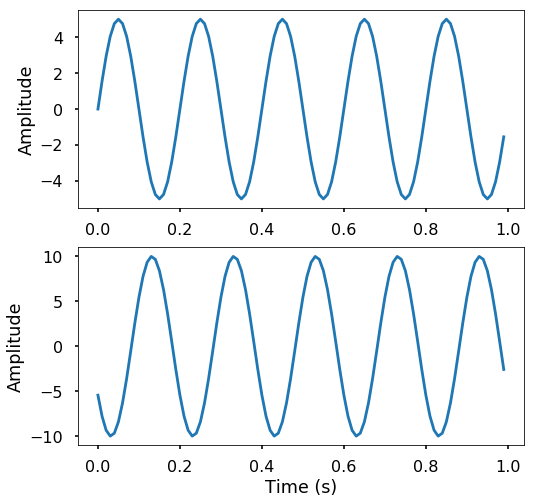

In [5]:
# frequency of the signal
freq = 5   
y = 5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y)
plt.ylabel('Amplitude')

y = 10*np.sin(2*np.pi*freq*t + 10)

plt.subplot(212)
plt.plot(t, y)
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

<!--NAVIGATION-->
< [CHAPTER 24. Fourier Transforms](chapter24.00-Fourier-Transforms.ipynb) | [Contents](Index.ipynb) | [24.2 Discrete Fourier Transform (DFT)](chapter24.02-Discrete-Fourier-Transform.ipynb) >